**Introduction**

Here we look at binary classification of points in 2-dimensions using traditional Machine Learning models called "Support Vector Machines" or SVMs. This is alternately done using geometric models such as computing the convex hulls of the datasets using efficient algorithms such as "Graham Scan" and "Jarvis' March". The complexity is analyzed and comparisons are made based on the number of points used in the datasets.

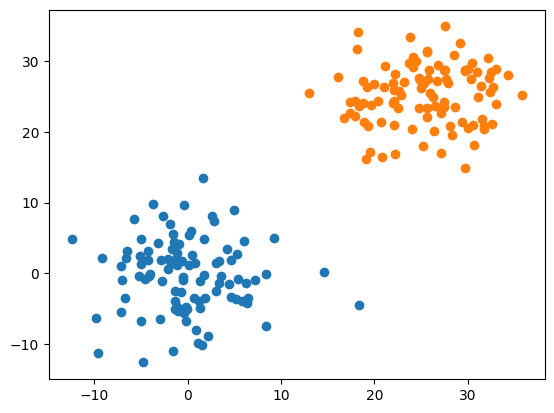

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from visualization import *
from scipy.spatial import ConvexHull, convex_hull_plot_2d

# SAMPLE RANDOM POINTS FROM NORMAL DISTRIBUTION
mu, sigma = 0, 5 # mean, std deviation
train_x = np.random.normal(mu, sigma, (100,2)) #training data
train_y = np.zeros(100) # class 0
test_x = np.random.normal(mu, sigma, (10,2)) # test data
test_y = np.zeros(10)
mu, sigma = [25,25], 5
train2_x = np.random.normal(mu, sigma, (100,2))
train2_y = np.ones(100) # class 1
test2_x = np.random.normal(mu, sigma, (10,2))
test2_y = np.ones(10)

# PLOT THE POINTS
plotClasses(train_x, train2_x, pointPlot=False)

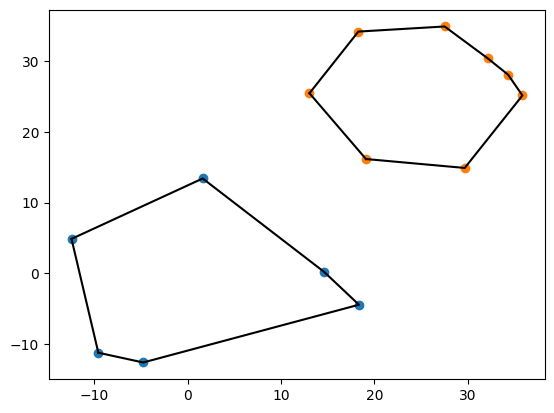

In [46]:
from convex_hull_algorithms import GrahamScan, JarvisMarch

# Run Graham scan on both the train datasets to generate two hulls
L1 = GrahamScan(train_x.tolist())
L2 = GrahamScan(train2_x.tolist())

# Plot the computed Convex Hull:
plotClasses(L1, L2)

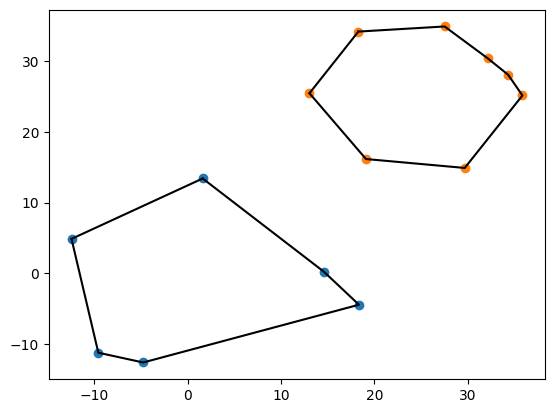

In [47]:
# Run Jarvis' march on both the train datasets to generate two hulls
L1 = JarvisMarch(train_x)
L2 = JarvisMarch(train2_x)

# Plot the computed Convex Hull:
plotClasses(L1, L2)

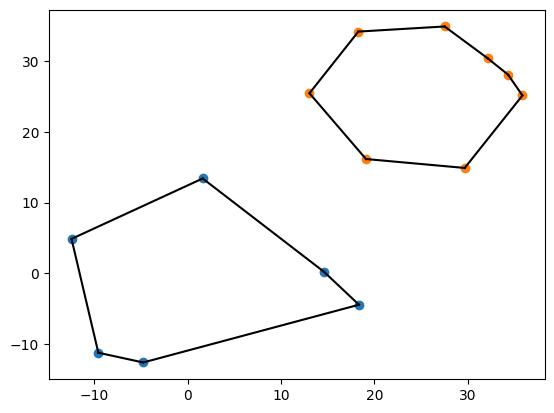

In [48]:
# Compute and plot the hulls using scipy.spatial.ConvexHull library
hull1 = ConvexHull(train_x)
# plt.plot(train_x[:,0], train_x[:,1], 'o')
plt.scatter(train_x[hull1.vertices][:,0], train_x[hull1.vertices][:,1])
for simplex in hull1.simplices:
    plt.plot(train_x[simplex, 0], train_x[simplex, 1], 'k-')
hull2 = ConvexHull(train2_x)
# plt.plot(train2_x[:,0], train2_x[:,1], 'o') 
plt.scatter(train2_x[hull2.vertices][:,0], train2_x[hull2.vertices][:,1])
for simplex in hull2.simplices:
    plt.plot(train2_x[simplex, 0], train2_x[simplex, 1], 'k-')
# plt.scatter(test_x[:,0], test_x[:,1], color='red')
# plt.scatter(test2_x[:,0], test2_x[:,1], color='green')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


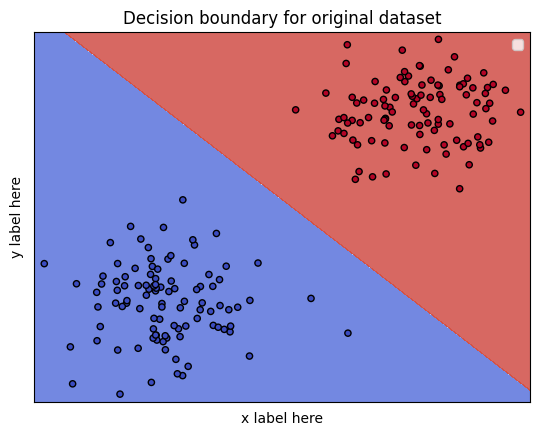

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


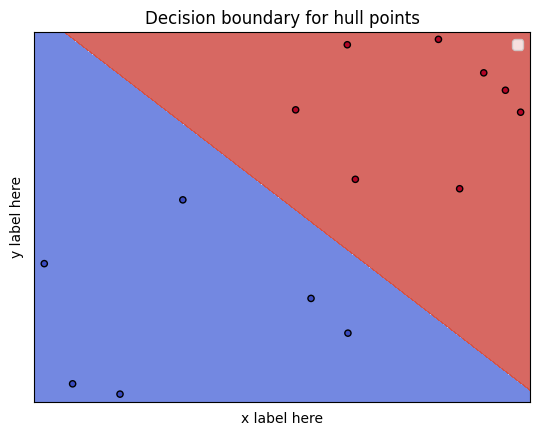

In [49]:
from svm_classifier import run_svm

# VISUALIZE THE SVM BOUNDARY - https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# y = iris.target
X_orig = np.append(train_x, train2_x, axis=0)
y_orig = np.append(train_y, train2_y)
X = np.append(L1, L2, axis=0)
y = np.append(np.zeros(L1.shape[0]), np.ones(L2.shape[0]))
# print(X.shape, y.shape)

# Running SVM on original datasets
run_svm(X_orig, y_orig, "Decision boundary for original dataset")

# Running SVM on hull points
run_svm(X, y, "Decision boundary for hull points")

Similar classification is also attempted in 3-dimensions as follows:

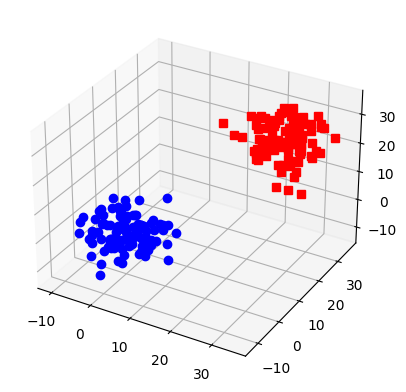

In [50]:
# SAMPLE RANDOM POINTS FROM NORMAL DISTRIBUTION
mu, sigma = 0, 5 # mean, std deviation
train_x = np.random.normal(mu, sigma, (100,3)) # training data
train_y = np.zeros(100) # class 0
test_x = np.random.normal(mu, sigma, (10,3)) # test data
test_y = np.zeros(10)
mu, sigma = [25,25,25], 5
train2_x = np.random.normal(mu, sigma, (100,3))
train2_y = np.ones(100) # class 1
test2_x = np.random.normal(mu, sigma, (10,3))
test2_y = np.ones(10)

# PLOT THE POINTS
# plt.scatter(train_x[:,0], train_x[:,1])
# plt.scatter(train2_x[:,0], train2_x[:,1])
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(train_x[:,0], train_x[:,1], train_x[:,2], 'ob')
ax.plot3D(train2_x[:,0], train2_x[:,1], train2_x[:,2], 'sr')
plt.show()



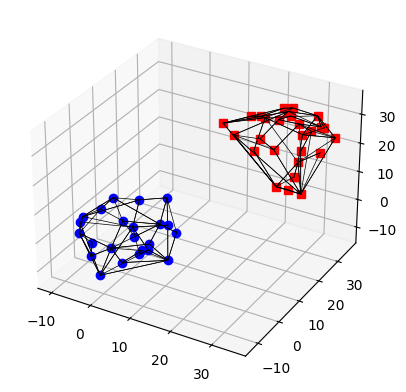

In [51]:
# COMPUTE AND PLOT THE HULLS
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
hull1 = ConvexHull(train_x)
ax.plot3D(train_x[hull1.vertices][:,0], train_x[hull1.vertices][:,1], train_x[hull1.vertices][:,2], 'ob')
for simplex in hull1.simplices:
    plt.plot(train_x[simplex, 0], train_x[simplex, 1], train_x[simplex, 2], 'k-', linewidth = 0.5)
hull2 = ConvexHull(train2_x)
ax.plot3D(train2_x[hull2.vertices][:,0], train2_x[hull2.vertices][:,1], train2_x[hull2.vertices][:,2], 'sr')
for simplex in hull2.simplices:
    plt.plot(train2_x[simplex, 0], train2_x[simplex, 1], train2_x[simplex, 2], 'k-', linewidth = 0.5)
# plt.scatter(test_x[:,0], test_x[:,1], color='red')
# plt.scatter(test2_x[:,0], test2_x[:,1], color='green')
plt.show()

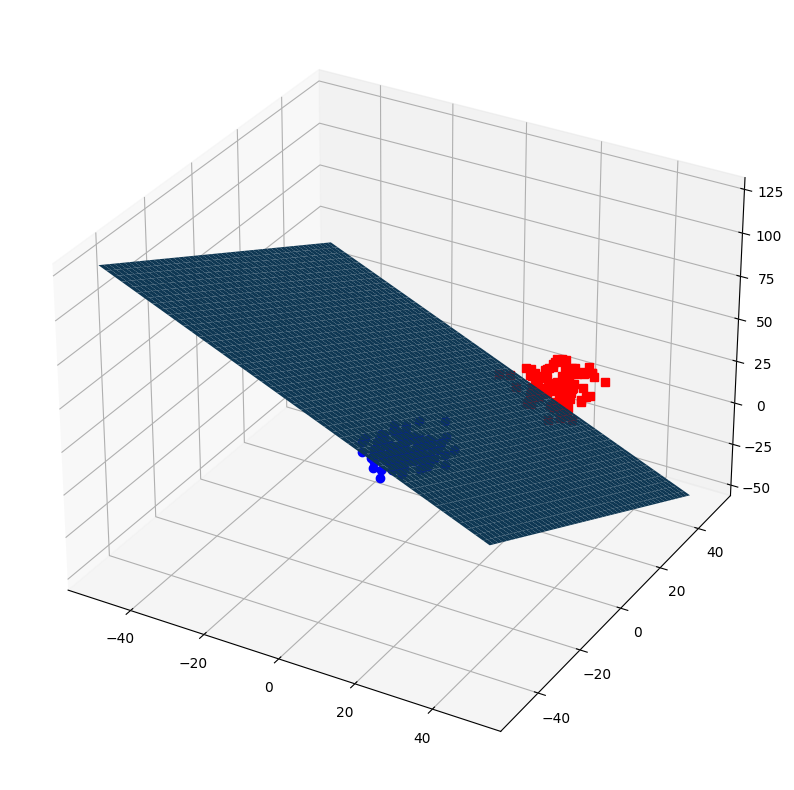

In [52]:
# 3D SVM PLOT - https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python
from sklearn.svm import SVC

#make it binary classification problem
# X = X[np.logical_or(Y==0,Y==1)]
# Y = Y[np.logical_or(Y==0,Y==1)]
X = np.append(train_x, train2_x, axis=0)
Y = np.append(train_y, train2_y)

model = SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

# tmp = np.linspace(-5,5,30)
tmp = np.linspace(-50,50,300)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
fig.set_size_inches(10,10)
ax  = fig.add_subplot(111, projection='3d')

ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
# ax.view_init(30, 60)
plt.show()

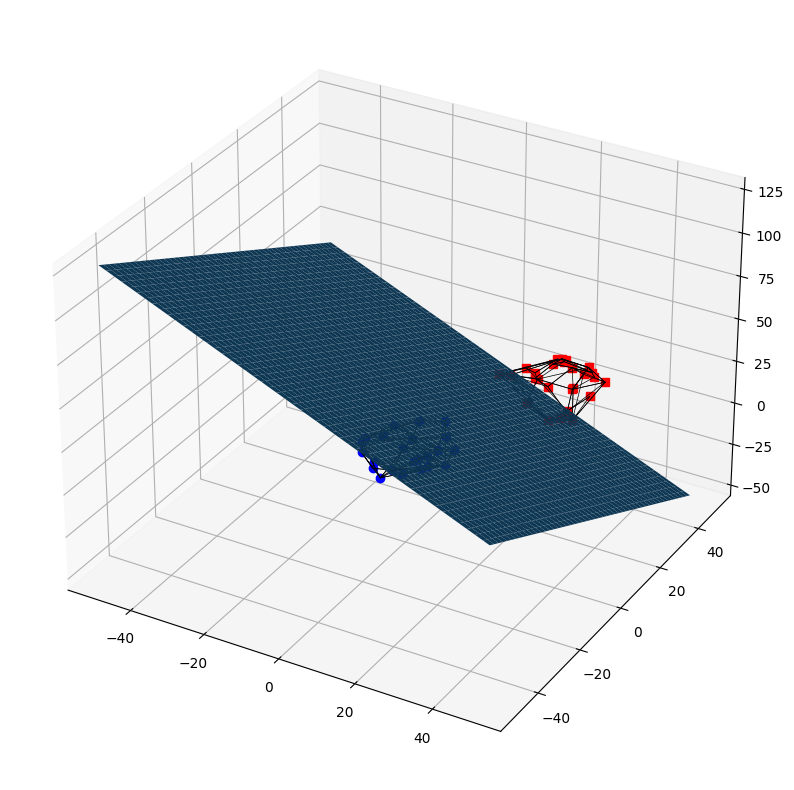

In [53]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax  = fig.add_subplot(111, projection='3d')

ax.plot3D(train_x[hull1.vertices][:,0], train_x[hull1.vertices][:,1], train_x[hull1.vertices][:,2], 'ob')
for simplex in hull1.simplices:
    plt.plot(train_x[simplex, 0], train_x[simplex, 1], train_x[simplex, 2], 'k-', linewidth = 0.5)
ax.plot3D(train2_x[hull2.vertices][:,0], train2_x[hull2.vertices][:,1], train2_x[hull2.vertices][:,2], 'sr')
for simplex in hull2.simplices:
    plt.plot(train2_x[simplex, 0], train2_x[simplex, 1], train2_x[simplex, 2], 'k-', linewidth = 0.5)
ax.plot_surface(x, y, z(x,y))
# ax.view_init(30, 60)
plt.show()